# 10 Introduction of tf_data

* 本代码对应笔记（11）：tf_data 简介

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Experiment 1：数据集的创建方法

### from_tensors 和 from_tensor_slices 的区别

#### 基于 列表 构造

In [2]:
ds = tf.data.Dataset.from_tensor_slices([1,2,3,4])
for line in ds:
    print(line)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [3]:
ds = tf.data.Dataset.from_tensors([1,2,3,4])
for line in ds:
    print(line)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


#### 基于 constant + 字典 构造

In [4]:
t = tf.constant([[1, 2], [3, 4]])
ds = tf.data.Dataset.from_tensors(t)   # [[1, 2], [3, 4]]
for line in ds:
    print(line)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [6]:
t = tf.constant([[1, 2], [3, 4]])
ds = tf.data.Dataset.from_tensors({"a":t,"b":t})   # [[1, 2], [3, 4]]
for line in ds:
    print(line)
    break

{'a': <tf.Tensor: id=43, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>, 'b': <tf.Tensor: id=44, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>}


#### 基于 numpy 构造

In [7]:
dataset1 = tf.data.Dataset.from_tensors(np.zeros(shape=(10,5,2), dtype=np.float32))
for line in dataset1:
    print(line.shape)
    break

(10, 5, 2)


In [9]:
dataset2 = tf.data.Dataset.from_tensor_slices(np.zeros(shape=(10,5,2), dtype=np.float32))
for line in dataset2:
    print(line.shape)
    break

(5, 2)


#### 基于 numpy + 字典 构造

In [10]:
dataset3=tf.data.Dataset.from_tensors({"a":np.zeros(shape=(10,5,2), dtype=np.float32),
                                       "b":np.zeros(shape=(10,5,2), dtype=np.float32)})
for line in dataset3:
    print(line['a'].shape,line['b'].shape)
    break

(10, 5, 2) (10, 5, 2)


In [11]:
dataset3=tf.data.Dataset.from_tensor_slices({"a":np.zeros(shape=(10,5,2), dtype=np.float32),
                                       "b":np.zeros(shape=(10,5,2), dtype=np.float32)})
for line in dataset3:
    print(line['a'].shape,line['b'].shape)
    break

(5, 2) (5, 2)


### numpy 完整数据读取

In [7]:
mnist = np.load("../../Dataset/mnist.npz")
x_train, y_train = mnist['x_train'], mnist['y_train']

x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
x_train = np.expand_dims(x_train, axis=-1) # 增加颜色通道维
x_train.shape

(60000, 28, 28, 1)

In [9]:
mnist_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)) # 构建数据集

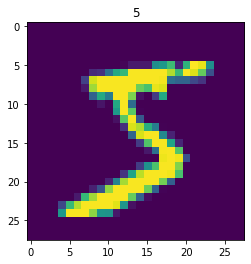

In [10]:
for image, label in mnist_dataset:
    plt.title(label.numpy())
    plt.imshow(image.numpy()[:, :,0])
    plt.show()
    break

### pandas 数据读取

In [12]:
df = pd.read_csv("../../Dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


#### 转换数据类型

In [13]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [14]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes

#### 建立数据集

In [15]:
target = df.pop('target')

In [16]:
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

In [17]:
for feat, targ in dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
   2. ], Target: 0
Features: [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
   3. ], Target: 1
Features: [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
   4. ], Target: 0
Features: [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
   3. ], Target: 0
Features: [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
   3. ], Target: 0


### 从 Python generator 构建数据管道

In [18]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [19]:
flowers = '../../Dataset/flower_photos'

In [21]:
def Gen():
    gen = img_gen.flow_from_directory(flowers)
    for (x, y) in gen:
        yield (x, y)

In [23]:
ds = tf.data.Dataset.from_generator(
    Gen,
    output_types=(tf.float32, tf.float32)
)

In [24]:
for image, label in ds:
    print(image.shape, label.shape)
    break

Found 60 images belonging to 5 classes.
(32, 256, 256, 3) (32, 5)


## Experiment 2：TFRecordDataset 用法实例

In [30]:
feature_description = { # 定义Feature结构，告诉解码器每个Feature的类型是什么
    'image': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64),
}

In [31]:
def _parse_example(example_string): # 将 TFRecord 文件中的每一个序列化的 tf.train.Example 解码
    feature_dict = tf.io.parse_single_example(example_string, feature_description)
    feature_dict['image'] = tf.io.decode_jpeg(feature_dict['image'])    # 解码JPEG图片
    feature_dict['image'] = tf.image.resize(feature_dict['image'], [256, 256]) / 255.0
    return feature_dict['image'], feature_dict['label']

In [32]:
batch_size = 32

In [33]:
train_dataset = tf.data.TFRecordDataset("../../Dataset/sub_train.tfrecords")

In [34]:
train_dataset = train_dataset.map(_parse_example)

In [37]:
for image, label in train_dataset:
    print(image.shape, label)
    break

(256, 256, 3) tf.Tensor(0, shape=(), dtype=int64)


## Experiment 3：TextLineDataset 用法实例

In [38]:
titanic_lines = tf.data.TextLineDataset(["../../Dataset/titanic_dataset/train.csv", "../../Dataset/titanic_dataset/eval.csv"])

In [39]:
def data_func(line):
    line = tf.strings.split(line, sep=',')
    return line

In [40]:
titanic_data = titanic_lines.skip(1).map(data_func)

In [41]:
for line in titanic_data:
    print(line)
    break

tf.Tensor(
[b'0' b'male' b'22.0' b'1' b'0' b'7.25' b'Third' b'unknown' b'Southampton'
 b'n'], shape=(10,), dtype=string)
